In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [7]:
# Importing data to dataframe
data = pd.read_csv("botscore.csv")
data

,user_id,age,count,activity,bot_score_english
0,13616,4256,23279,5.469690,0.020441
1,614513,4124,525,0.127304,0.073133
2,5565,4313,8146,1.888709,0.041325
3,19783,4226,3510,0.830573,0.014311
4,2631,4351,8146,1.872213,0.058340
...,...,...,...,...,...
11185,4915142355,3077,20290,6.594085,0.530100
11186,4918929727,3077,26841,8.723107,0.010001
11187,4920512909,3077,44037,14.311667,0.025888
11188,4910272047,3077,5780,1.878453,0.058340


Text(0, 0.5, 'Score')

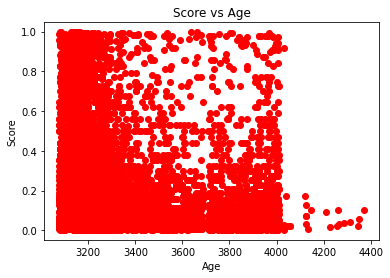

In [8]:
plt.scatter(data["age"], data["bot_score_english"], color="red")
plt.title("Score vs Age")
plt.xlabel("Age")
plt.ylabel("Score")

# Less probability of being a bot with increasing age.

Text(0, 0.5, 'Score')

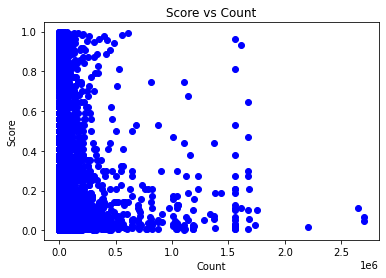

In [9]:
plt.scatter(data["count"], data["bot_score_english"], color="blue")
plt.title("Score vs Count")
plt.xlabel("Count")
plt.ylabel("Score")

# Less probability of being a bot with increasing count.

Text(0, 0.5, 'Score')

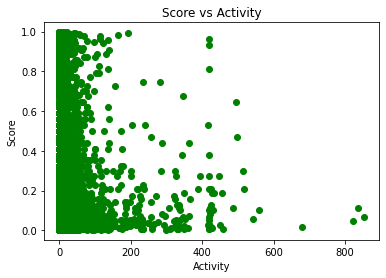

In [10]:
plt.scatter(data["activity"], data["bot_score_english"], color="green")
plt.title("Score vs Activity")
plt.xlabel("Activity")
plt.ylabel("Score")

# Less probability of being a bot with increasing activity.
# Very similar to the variation of score with count.

In [11]:
# Generating the feature array
x = data.iloc[:,1:4].values
x

array([[4.25600000e+03, 2.32790000e+04, 5.46968985e+00],
       [4.12400000e+03, 5.25000000e+02, 1.27303589e-01],
       [4.31300000e+03, 8.14600000e+03, 1.88870856e+00],
       ...,
       [3.07700000e+03, 4.40370000e+04, 1.43116672e+01],
       [3.07700000e+03, 5.78000000e+03, 1.87845304e+00],
       [3.07700000e+03, 2.49360000e+04, 8.10399740e+00]])

In [12]:
# Generating the target array
y = data.iloc[:,4].values
y

array([0.0204408 , 0.07313295, 0.04132462, ..., 0.02588806, 0.05834   ,
       0.09131313])

In [13]:
# Scaling data in range of 0 to 1
scaler = MinMaxScaler()
X = scaler.fit_transform(x)
X

array([[9.11832947e-01, 8.61933942e-03, 6.42152647e-03],
       [8.09744780e-01, 1.94025855e-04, 1.49167404e-04],
       [9.55916473e-01, 3.01591716e-03, 2.21718792e-03],
       ...,
       [0.00000000e+00, 1.63055774e-02, 1.68026659e-02],
       [0.00000000e+00, 2.13983858e-03, 2.20514718e-03],
       [0.00000000e+00, 9.23289064e-03, 9.51439958e-03]])

In [14]:
# Generating model using SVR
model = DecisionTreeRegressor()
model.fit(X,y)

DecisionTreeRegressor()

In [19]:
# Predicting using sample data
prediction = model.predict(X)
prediction

array([0.0204408 , 0.07313295, 0.04132462, ..., 0.02588806, 0.05834   ,
       0.09131313])

(0.0, 1.0)

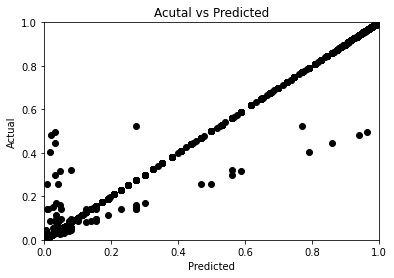

In [20]:
# Checking accuracy of prediction
plt.scatter(y, prediction, color="black", label="Accuracy")
plt.title("Acutal vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Actual")
ax = plt.gca()
ax.set_xlim((0,1))
ax.set_ylim((0,1))
# Straight line y=x indicates that model is making correct predictions

In [23]:
# Error calculation and accuracy analysis
error = sqrt(mean_squared_error(y,prediction))
error

0.01484550775212396